# Statistial Power
---

Suppose we defined a Null hypothesis $H_0: \mu = \mu_9$ and an alternative $H_1: \mu \neq \mu_0$

$\alpha$ = type I error<br>
$\beta$ = type II error

Significance $\alpha$ = tolerable risk of erroneous $H_0$ rejection<br>
Power $1-\beta$ = the share of cases when $H_1$ is accepted

<img src="img/testing1.png" width=750>

This is how $\alpha$ and $\beta$ are typically related

<img src="img/alpha_beta.png" width=500>

There is an area in the middle with low significance but still high power - this is the desired area for a good test


# Minimum Detectable Effect
---
__MDE__ = the distance between $H_0$ and $H_1$ under which the test might detect the difference with the desired metrics (signifcance $\alpha$ and power $1-\beta$)

Suppose we have some fixed $H_0: \mathbb{E}(x) = \mu_0$

We consider the spread parameter to be constant $\sigma = const$, only location might change

Algorithm:
1. We choose the threshold $z_{\alpha}$ to match the desired significance level $\alpha$

2. We loop over possible H_1 until the power reaches the value of $1-\beta$

The answer is:$$\mathrm{MDE} = (z_{1-\alpha} + z_{1-\beta}) \sqrt{\frac{2\sigma^2}{n}}$$

__Proof__<br>First we choose a critical value for $H_0$ that satisfies the significance condition<br>Denote its z-score under $H_0$ as $z_{1-\alpha}$<br><br>Next we need to find such location of $H_1$ that the power of the test (at previously selected critical value) is at least $\beta$:<br>
$P(Z_{H_1} < z_{1-\alpha}) = \beta$<br><br>If we shift the center to the $\mu_1$:<br>
$P(Z - \mu < t - \mu) = \beta$<br>The expression is a z-score centered around $H_!$:<br>
$\mu_1=z_{1-\alpha}-z_{\beta} = z_{1-\alpha}+z_{1-\beta}$

Let's evaluate the variance:<br>
$$\mathrm{Var}(\mu_1 - \mu_0) = \sqrt{\frac{2 \sigma^2}{n}}$$

If we denormalize back to original scale:<br>


# Sample Size
---
Required data size can be infered from the same relation:<br>
$$\Delta = \frac{\sigma}{\sqrt{n}} \, ( z_{1-\alpha}+z_{1-\beta})$$

Swap $\Delta$ and $n$ to get:<br>
$$n = \big[\frac{\sigma}{\Delta} \, ( z_{1-\alpha}+z_{1-\beta})\big]^2$$

The smaller detectable effect $\Delta$, the more data samples are required (and relation is quadratic)




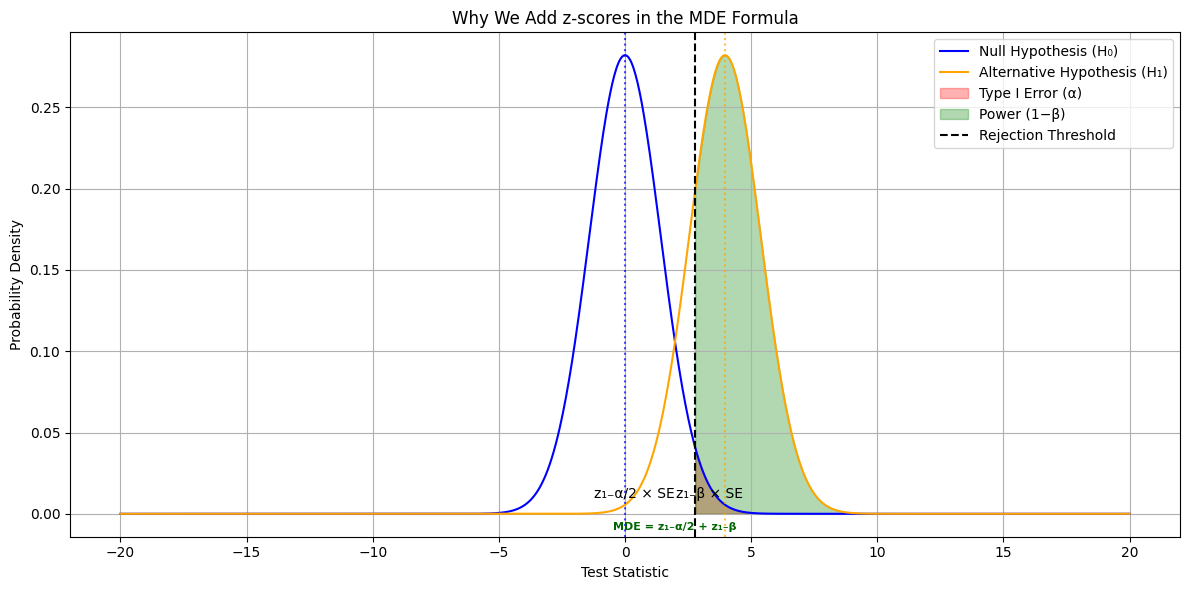

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
alpha = 0.05         # significance level
power = 0.80         # desired power
sigma = 10           # population standard deviation
n = 100              # sample size per group
standard_error = np.sqrt(2 * sigma**2 / n)

# Z-scores
z_alpha = norm.ppf(1 - alpha / 2)  # two-sided test
z_beta = norm.ppf(power)          # corresponding z for power
mde = (z_alpha + z_beta) * standard_error  # minimum detectable effect

# Define distributions
x = np.linspace(-20, 20, 1000)
null_pdf = norm.pdf(x, loc=0, scale=standard_error)
alt_pdf = norm.pdf(x, loc=mde, scale=standard_error)

# Rejection threshold (test statistic)
threshold = z_alpha * standard_error

# Plot distributions
plt.figure(figsize=(12, 6))
plt.plot(x, null_pdf, label='Null Hypothesis (H₀)', color='blue')
plt.plot(x, alt_pdf, label='Alternative Hypothesis (H₁)', color='orange')

# Rejection region (Type I Error)
x_alpha = x[x > threshold]
plt.fill_between(x_alpha, 0, norm.pdf(x_alpha, loc=0, scale=standard_error),
                 color='red', alpha=0.3, label='Type I Error (α)')

# Power region (1 - β)
x_power = x[x > threshold]
plt.fill_between(x_power, 0, norm.pdf(x_power, loc=mde, scale=standard_error),
                 color='green', alpha=0.3, label='Power (1−β)')

# Add threshold lines
plt.axvline(threshold, color='black', linestyle='--', label='Rejection Threshold')
plt.axvline(0, color='blue', linestyle=':', alpha=0.7)
plt.axvline(mde, color='orange', linestyle=':', alpha=0.7)

# Annotate distances
plt.annotate(f'z₁₋α/2 × SE',
             xy=(threshold / 2 - 1.0, 0.01), ha='center', color='black')
plt.annotate(f'z₁₋β × SE',
             xy=((threshold + mde) / 2, 0.01), ha='center', color='black')
plt.annotate('MDE = z₁₋α/2 + z₁₋β',
             xy=(mde / 2, -0.01), ha='center', fontsize=8, fontweight='bold', color='darkgreen')

# Styling
plt.title('Why We Add z-scores in the MDE Formula')
plt.xlabel('Test Statistic')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
